In [3]:
import os
import time
import pandas as pd
import numpy as np
import csv
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
import collections
from collections import Counter

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.porter import * 

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [9]:
# load data
training = pd.read_csv('feat_eng_train_data.csv')

# remove rows with none values
training = training.dropna(0, 'any')

# Features TODO: correct feature names
features = ['tokens', 'neu_scores', 'neg_scores', 'compound_scores', 'pos_scores']
label = ['score']

# Saving features and label data in X and y for train-test split
X = training[[col for col in training.columns if col in features]]
y = training[label]

# splitting data into training and validation set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

training.head(3)

,score,tokens,neg_scores,neu_scores,pos_scores,compound_scores,NOUN,PRON,VERB,ADJ,ADV
0,0.0,0.0,0.0,0.000,0.000,0.0000,1.0,0.0,0.0,1.0,0.0
1,0.0,thought sleep option tomorrow realiz evalu mor...,0.0,1.000,0.000,0.0000,1.0,0.0,1.0,1.0,0.0
2,0.0,life cool,0.0,0.303,0.697,0.3182,1.0,0.0,1.0,0.0,0.0


In [10]:
# Helper functions from gracecarrillo

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
# Pipeline to convert tweets to a matrix of TF-IDF features.
tfidf = Pipeline([
                ('selector', TextSelector(key='tokens')),
                ('tfidf', TfidfVectorizer())
            ])

# Pipeline to convert tweets to a matrix of token counts
countvect = Pipeline([
                ('selector', TextSelector(key='tokens')),
                ('countvect', CountVectorizer())
            ])

# Applying tfidf anf countvec to features
neu_scores =  Pipeline([
                ('selector', NumberSelector(key='neu_scores')),
                ('minmax', MinMaxScaler())
            ])
neg_scores =  Pipeline([
                ('selector', NumberSelector(key='neg_scores')),
                ('minmax', MinMaxScaler())
            ])
pos_scores =  Pipeline([
                ('selector', NumberSelector(key='pos_scores')),
                ('minmax', MinMaxScaler())
            ])

compound_scores =  Pipeline([
                ('selector', NumberSelector(key='compound_scores')),
                ('minmax', MinMaxScaler())
            ])

In [11]:
# load data
testing = pd.read_csv('cleaned_test_data.csv')

# remove rows with none values
testing = testing.dropna(0, 'any')

testing.head(3)

,tokens
0,republican district longer hour democrat distr...
1,rememb ratherg 60 minut got dan rather fire to...
2,oh republican presid republic…


In [12]:
# load the naive-bayes model
nb_model = joblib.load('twitter_sentiment_naivebayes.pkl')
result_nb = nb_model.score(X_test, y_test)

In [13]:
# load the svm model
svm_model = joblib.load('twitter_sentiment_svm.pkl')
result_svm = svm_model.score(X_test, y_test)

In [55]:
# load testing data
testing = pd.read_csv('cleaned_test_data.csv')
print(testing.shape)

# remove rows with none values
testing.dropna(0, 'any')
testing.dropna(subset = ["tokens"], inplace=True)

testing.head(3)

(267, 5)


,tokens,neg_scores,neu_scores,pos_scores,compound_scores
0,republican district longer hour democrat distr...,0.000,1.000,0.0,0.00
1,rememb ratherg 60 minut got dan rather fire to...,0.167,0.833,0.0,-0.34
2,oh republican presid republic…,0.000,1.000,0.0,0.00


In [20]:
# predictions

# naive-bayes
y_nb_predictions = nb_model.predict(testing)
np.save('test_prediction_nb.npy', y_nb_predictions)

In [21]:
# SVM
y_svm_predictions = svm_model.predict(testing)
np.save('test_prediction_svm.npy', y_svm_predictions)

In [5]:
nb = np.load('test_prediction_nb.npy')
svm = np.load('test_prediction_svm.npy')

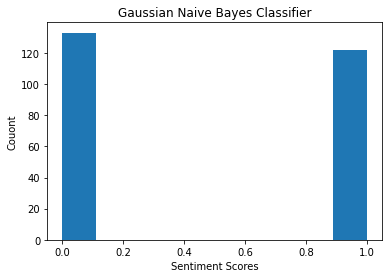

In [19]:
a = np.hstack(nb)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Gaussian Naive Bayes Classifier")
plt.xlabel("Sentiment Scores")
plt.ylabel("Count")
plt.show()

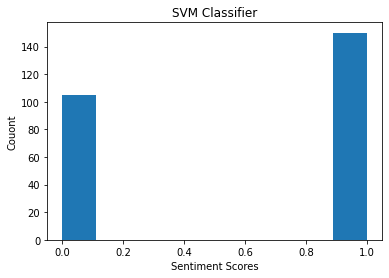

In [20]:
b = np.hstack(svm)
_ = plt.hist(b, bins='auto')  # arguments are passed to np.histogram
plt.title("SVM Classifier")
plt.xlabel("Sentiment Scores")
plt.ylabel("Count")
plt.show()

In [62]:
indices = testing.index
print(indices)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
            ...
            257, 258, 259, 260, 261, 262, 263, 264, 265, 266],
           dtype='int64', length=255)


In [63]:
testing = pd.read_csv('cleaned_test_data.csv')

In [67]:
testing.head(8)

,tokens,neg_scores,neu_scores,pos_scores,compound_scores
0,republican district longer hour democrat distr...,0.000,1.000,0.000,0.0000
1,rememb ratherg 60 minut got dan rather fire to...,0.167,0.833,0.000,-0.3400
2,oh republican presid republic…,0.000,1.000,0.000,0.0000
3,toobin journalist therefor democrat someth sex...,0.000,1.000,0.000,0.0000
4,we’r talk stuff make excit republican big up,0.000,1.000,0.000,0.0000
5,blue state republican hous legislatur 4 5 exec...,0.000,1.000,0.000,0.0000
6,fox 🦊 advocaci 4polic 👮‍♀️ yet defam americans...,0.000,0.806,0.194,0.5574
7,NaN,0.000,0.000,0.000,0.0000


In [75]:
testing.dropna(inplace=True)

In [76]:
testing.dropna().head(8)

,tokens,neg_scores,neu_scores,pos_scores,compound_scores
0,republican district longer hour democrat distr...,0.000,1.000,0.000,0.0000
1,rememb ratherg 60 minut got dan rather fire to...,0.167,0.833,0.000,-0.3400
2,oh republican presid republic…,0.000,1.000,0.000,0.0000
3,toobin journalist therefor democrat someth sex...,0.000,1.000,0.000,0.0000
4,we’r talk stuff make excit republican big up,0.000,1.000,0.000,0.0000
5,blue state republican hous legislatur 4 5 exec...,0.000,1.000,0.000,0.0000
6,fox 🦊 advocaci 4polic 👮‍♀️ yet defam americans...,0.000,0.806,0.194,0.5574
8,“voter integr laws” racist republican voter su...,0.364,0.636,0.000,-0.6124


In [77]:
testing = testing.dropna().reset_index(drop=True)

In [78]:
testing.head(8)

,tokens,neg_scores,neu_scores,pos_scores,compound_scores
0,republican district longer hour democrat distr...,0.000,1.000,0.000,0.0000
1,rememb ratherg 60 minut got dan rather fire to...,0.167,0.833,0.000,-0.3400
2,oh republican presid republic…,0.000,1.000,0.000,0.0000
3,toobin journalist therefor democrat someth sex...,0.000,1.000,0.000,0.0000
4,we’r talk stuff make excit republican big up,0.000,1.000,0.000,0.0000
5,blue state republican hous legislatur 4 5 exec...,0.000,1.000,0.000,0.0000
6,fox 🦊 advocaci 4polic 👮‍♀️ yet defam americans...,0.000,0.806,0.194,0.5574
7,“voter integr laws” racist republican voter su...,0.364,0.636,0.000,-0.6124


In [89]:
rep = []
dem = []
for i in range(0, len(testing)):
    if 'republican' in testing['tokens'][i]:
        rep.append(nb[i])
    if 'democrat' in testing['tokens'][i]:
        dem.append(nb[i])
print(rep)
print(dem)

[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]


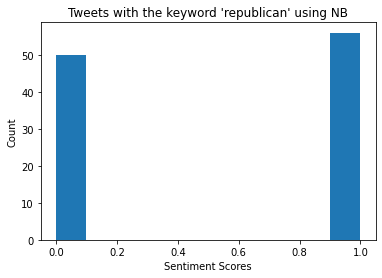

In [92]:
plt.hist(rep)
plt.title("Tweets with the keyword 'republican' using NB")
plt.xlabel("Sentiment Scores")
plt.ylabel("Count")
plt.show()

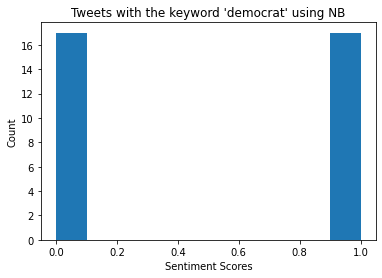

In [93]:
plt.hist(dem)
plt.title("Tweets with the keyword 'democrat' using NB")
plt.xlabel("Sentiment Scores")
plt.ylabel("Count")
plt.show()

In [94]:
rep = []
dem = []
for i in range(0, len(testing)):
    if 'republican' in testing['tokens'][i]:
        rep.append(svm[i])
    if 'democrat' in testing['tokens'][i]:
        dem.append(svm[i])
print(rep)
print(dem)

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]


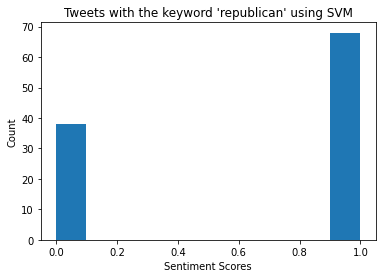

In [95]:
plt.hist(rep)
plt.title("Tweets with the keyword 'republican' using SVM")
plt.xlabel("Sentiment Scores")
plt.ylabel("Count")
plt.show()

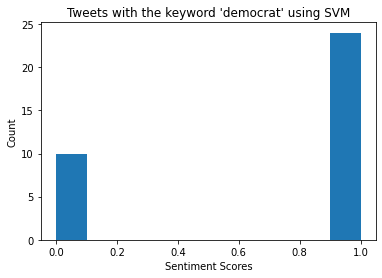

In [88]:
plt.hist(dem)
plt.title("Tweets with the keyword 'democrat' using SVM")
plt.xlabel("Sentiment Scores")
plt.ylabel("Count")
plt.show()